Section I: Data Load and Quick Look at Columns


In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# To visually format titles between sections
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Load the data from Github Raw
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

# Quick Column Summary
column_summary = df.describe()
print(color.BOLD + color.DARKCYAN + color.UNDERLINE + 'Summary Statistics:\n' + color.END + '\n', column_summary)

# Seeing Missing Data
print('\n')
missing_data = df.isnull().sum()
print(color.BOLD + color.DARKCYAN + color.UNDERLINE + 'Missing Data:\n' + color.END + '\n' , missing_data)

# Visual division of code
print('\n' + '==========================================================' + '\n')

# Manually written text of findings

print(color.BOLD + color.DARKCYAN + color.UNDERLINE + 'Summary Findings:' + color.END + '\n' +
'• Age: Mean age is 44.39 years with a standard deviation of 15.32.' + '\n' +
'• Monthly Payment: Mean payment is $14.58 with most payments at $14.99.' + '\n' +
'• Monthly Hours Watched: Mean of 19.07 hours with significant variability.' + '\n' +
'• Average Session Length: Mean session length is 1.89 hours with a wide range.')

Summary Statistics:

            User_ID          Age  Monthly_Payment  Monthly_Hours_Watched  \
count  1000.000000  1000.000000      1000.000000            1000.000000   
mean    500.500000    44.385000        14.580000              19.071653   
std     288.819436    15.321669         3.404922              19.279140   
min       1.000000    18.000000         9.990000               0.041574   
25%     250.750000    31.750000         9.990000               5.490739   
50%     500.500000    45.000000        14.990000              13.361219   
75%     750.250000    57.000000        14.990000              26.471636   
max    1000.000000    70.000000        19.990000             139.170408   

       Average_Session_Length   Content_ID  Rating_Given      Churned  
count             1000.000000  1000.000000   1000.000000  1000.000000  
mean                 1.893771  1049.201000      3.030000     0.246000  
std                  1.868852    29.268058      1.422365     0.430894  
min           

Section II: Visualizing the Distributions of Some Columns


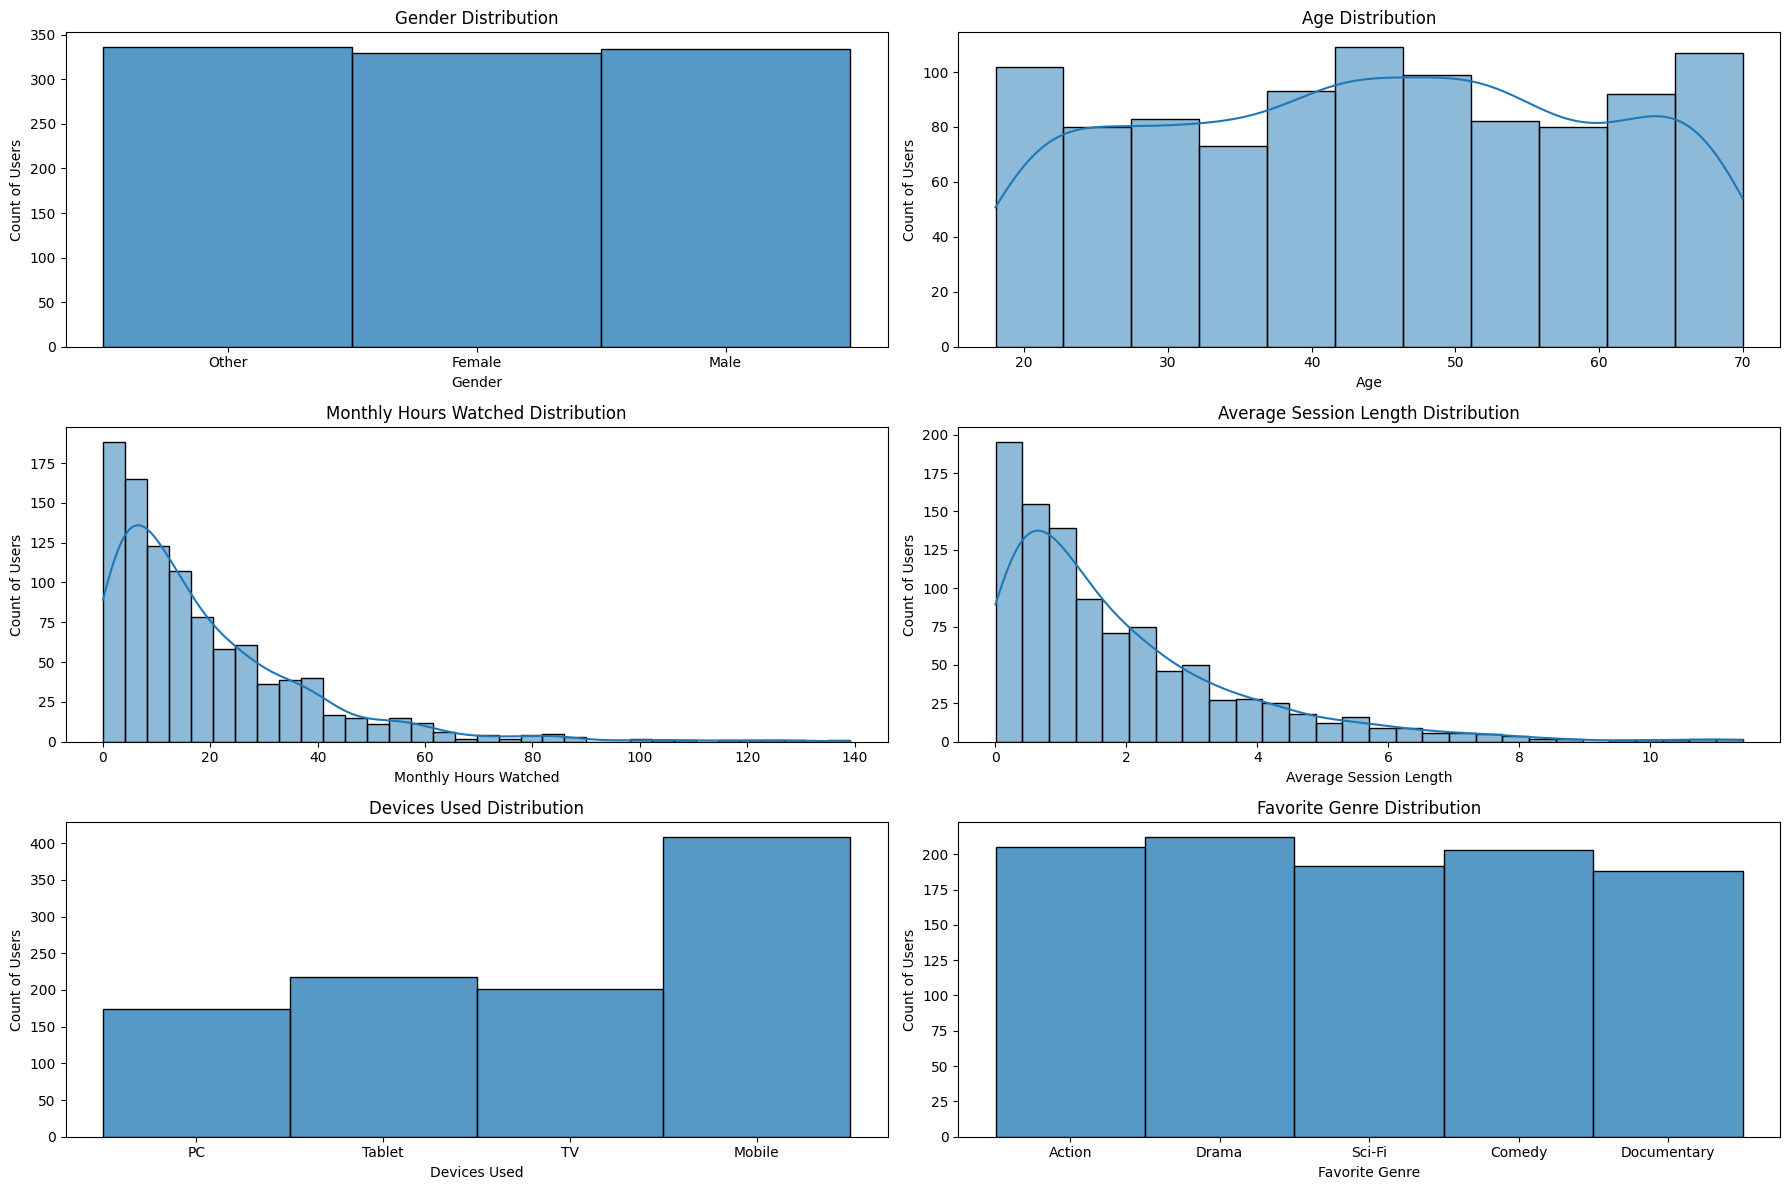

In [15]:
# Create a figure with a 3x2 grid of subplots
plt.figure(figsize=(18, 12))

# Plotting Gender distribution
plt.subplot(3, 2, 1)
sns.histplot(df['Gender'], kde=False)
plt.title('Gender Distribution')
plt.ylabel('Count of Users')
plt.xlabel('Gender')

# Plotting Age distribution
plt.subplot(3, 2, 2)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.ylabel('Count of Users')
plt.xlabel('Age')

# Plotting Monthly hours watched distribution
plt.subplot(3, 2, 3)
sns.histplot(df['Monthly_Hours_Watched'], kde=True)
plt.title('Monthly Hours Watched Distribution')
plt.ylabel('Count of Users')
plt.xlabel('Monthly Hours Watched')

# Plotting Average session length distribution
plt.subplot(3, 2, 4)
sns.histplot(df['Average_Session_Length'], kde=True)
plt.title('Average Session Length Distribution')
plt.ylabel('Count of Users')
plt.xlabel('Average Session Length')

# Plotting Devices Used distribution
plt.subplot(3, 2, 5)
sns.histplot(df['Devices_Used'], kde=False)
plt.title('Devices Used Distribution')
plt.ylabel('Count of Users')
plt.xlabel('Devices Used')

# Plotting Favorite Genre distribution
plt.subplot(3, 2, 6)
sns.histplot(df['Favorite_Genre'], kde=False)
plt.title('Favorite Genre Distribution')
plt.ylabel('Count of Users')
plt.xlabel('Favorite Genre')

# Adjust layout
plt.tight_layout()
plt.show()

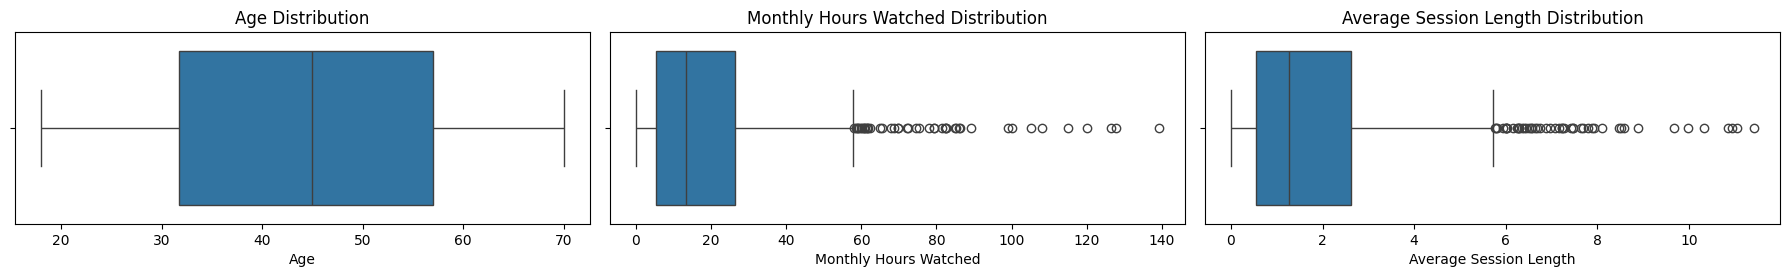

In [16]:
# Create a figure with a 3x2 grid of subplots
plt.figure(figsize=(18, 5))

# Plotting Age distribution
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')

# Plotting Monthly hours watched distribution
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Monthly_Hours_Watched'])
plt.title('Monthly Hours Watched Distribution')
plt.xlabel('Monthly Hours Watched')

# Plotting Average session length distribution
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Average_Session_Length'])
plt.title('Average Session Length Distribution')
plt.xlabel('Average Session Length')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.5)
plt.show()

Section III: Visualizing Payment by Age Group

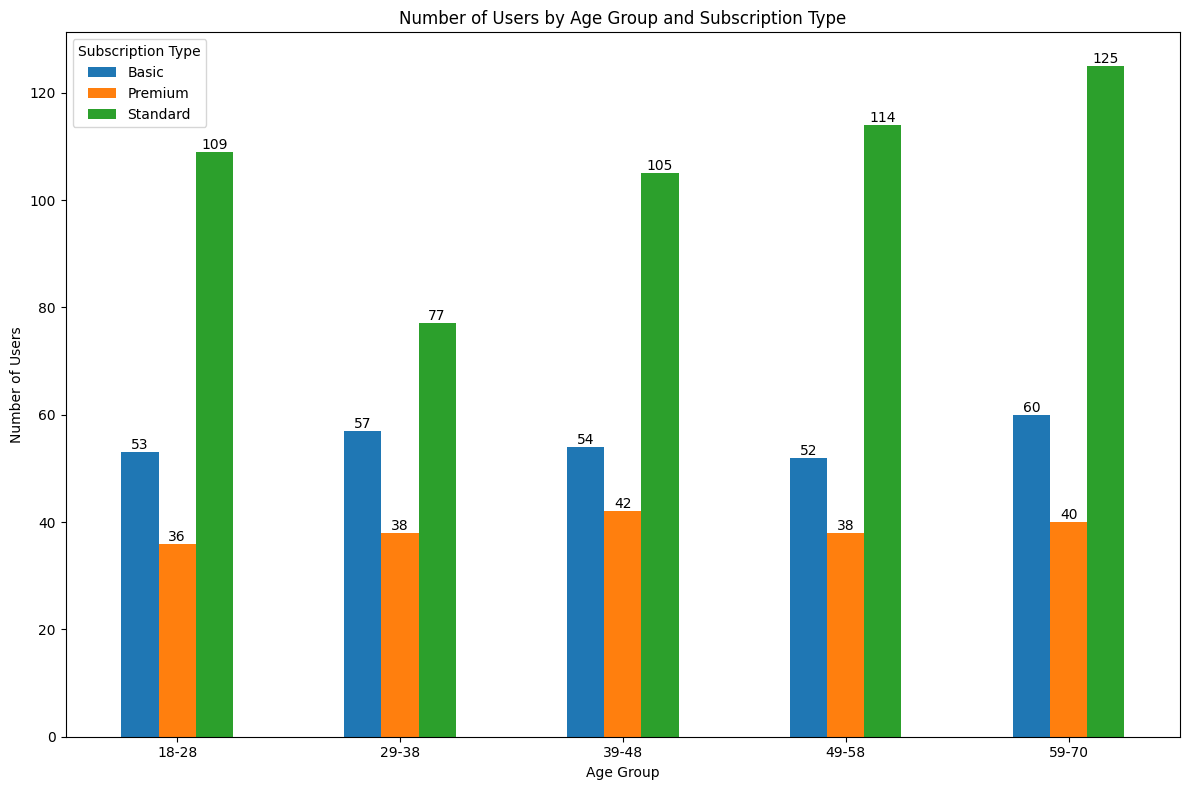

Summary Findings:
• It seems like all age groups have a very similar distribution when it comes to Subscription Type.
• Hence, we will have to dig a level deeper to analyze if there is something related to age and churn.


In [17]:
# Bin Age and add labels
age_bins = [18, 29, 39, 49, 59, 71]
age_labels = ['18-28', '29-38', '39-48', '49-58', '59-70']

# Add the 'Age_Group' column to the dataset
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Add the 'Churn_Flag' column to the dataset
df['Churn_Flag'] = np.where(df['Reason_for_Churn'].isnull(), 'No', 'Yes')

# Group by Age_Group and Subscription_Type and count the number of users
age_group_subscription = df.groupby(['Age_Group', 'Subscription_Type'], observed=False).size().unstack(fill_value=0)

# Remove rows with missing values in 'Age_Group'
age_group_subscription = age_group_subscription.dropna()

# Plot the data
ax = age_group_subscription.plot(kind='bar', stacked=False, figsize=(12, 8))

# Set plot labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Users')
ax.set_title('Number of Users by Age Group and Subscription Type')
ax.legend(title='Subscription Type')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container)

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Manually written text of findings

print(color.BOLD + color.DARKCYAN + color.UNDERLINE + 'Summary Findings:' + color.END + '\n' +
'• It seems like all age groups have a very similar distribution when it comes to Subscription Type.' + '\n' +
'• Hence, we will have to dig a level deeper to analyze if there is something related to age and churn.')

Section IV: Visualizing Users Churned by Subscription Types versus Other Columns

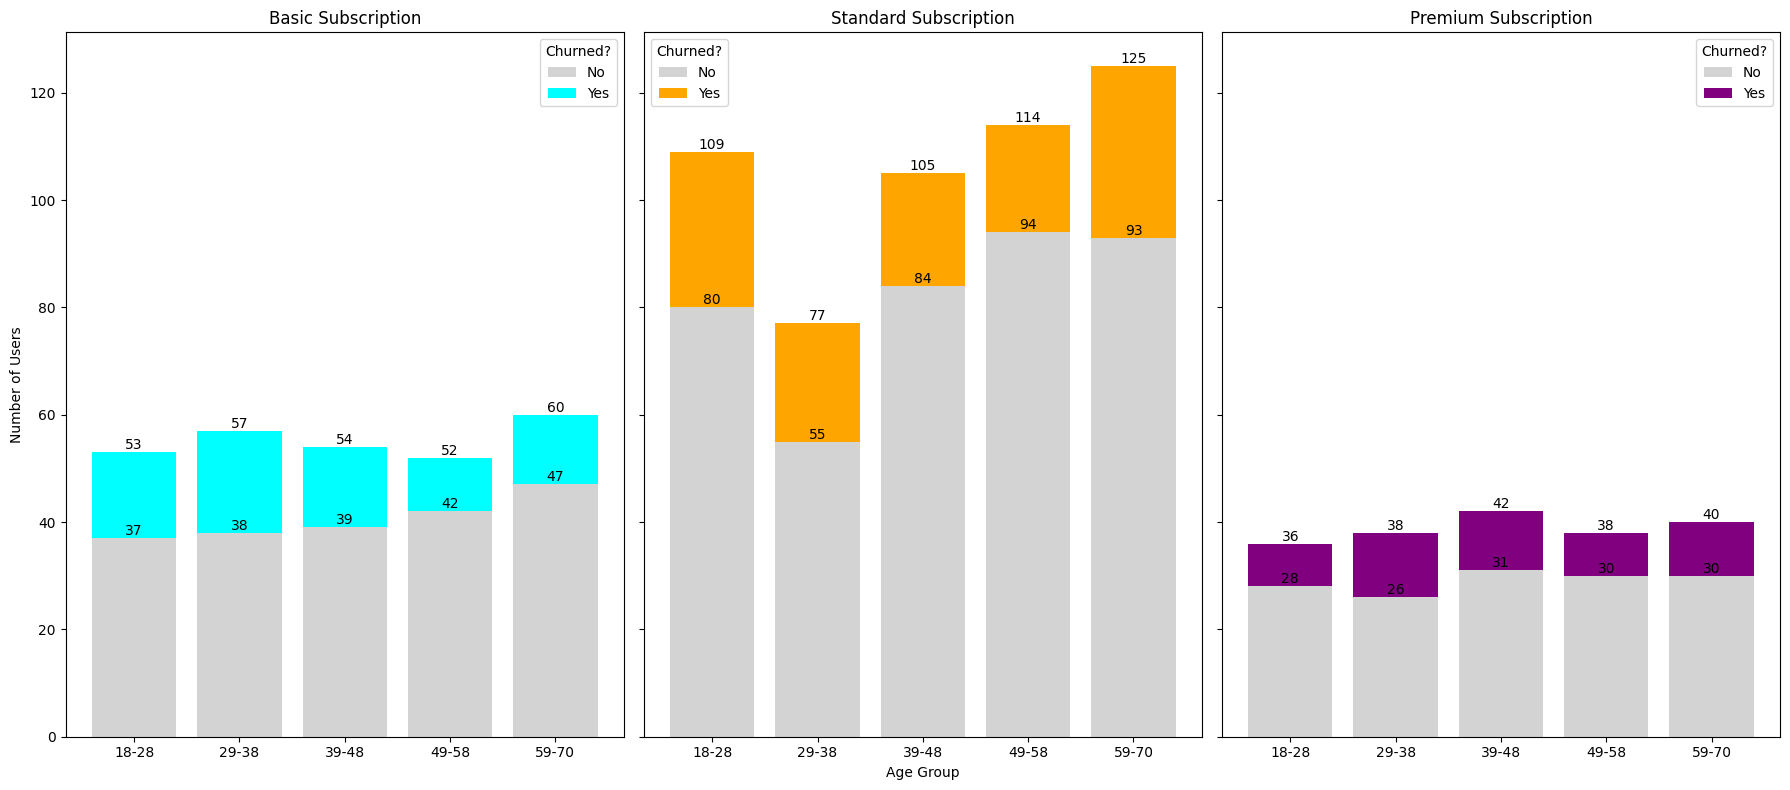

In [18]:
# Filter data for each subscription type
basic_data = df[df['Subscription_Type'] == 'Basic']
standard_data = df[df['Subscription_Type'] == 'Standard']
premium_data = df[df['Subscription_Type'] == 'Premium']

# Group by Age Group and Churn Flag - and count the number of users for each subscription type
basic_churn = basic_data.groupby(['Age_Group', 'Churn_Flag'], observed=False).size().unstack(fill_value=0)
standard_churn = standard_data.groupby(['Age_Group', 'Churn_Flag'], observed=False).size().unstack(fill_value=0)
premium_churn = premium_data.groupby(['Age_Group', 'Churn_Flag'], observed=False).size().unstack(fill_value=0)

# Plot the data with stacked columns for each subscription type and age group
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

basic_churn.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, color=['lightgray', 'cyan'])
axes[0].set_title('Basic Subscription')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Users')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Churned?')

standard_churn.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, color=['lightgray', 'orange'])
axes[1].set_title('Standard Subscription')
axes[1].set_xlabel('Age Group')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Churned?')

premium_churn.plot(kind='bar', stacked=True, ax=axes[2], width=0.8, color=['lightgray', 'purple'])
axes[2].set_title('Premium Subscription')
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend(title='Churned?')

# Adding data labels for each plot
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

# Display the plots
plt.tight_layout()
plt.show()

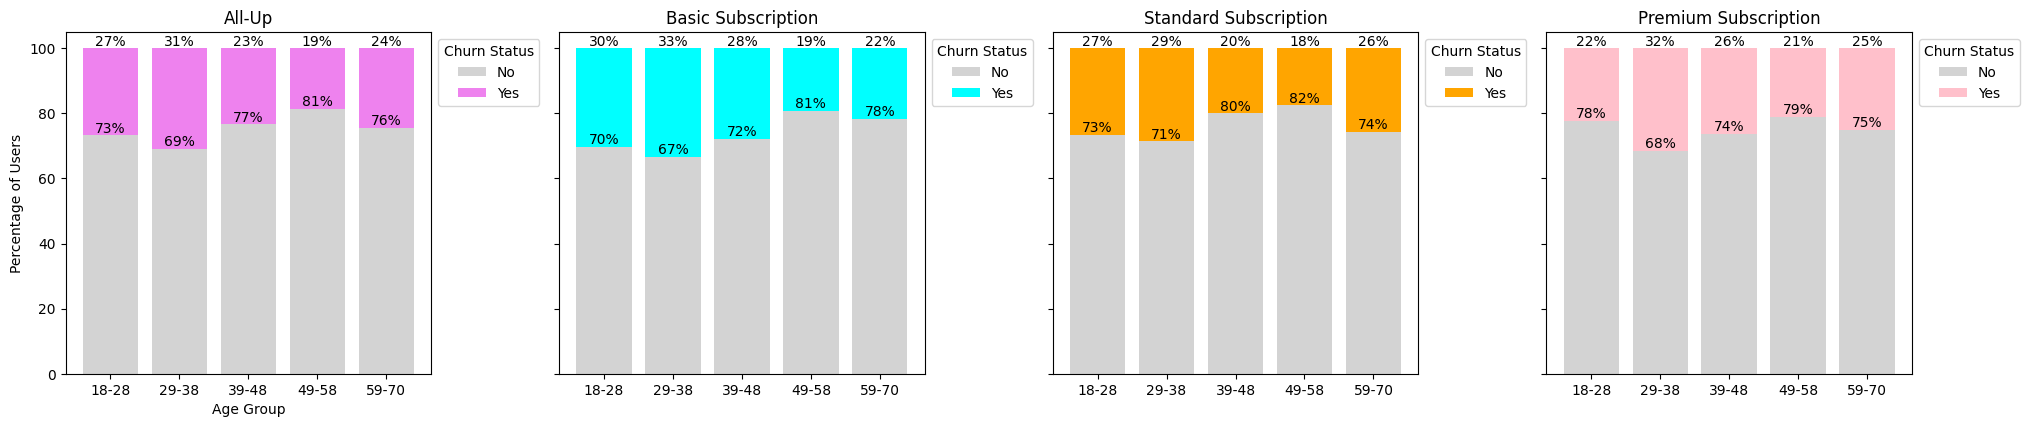

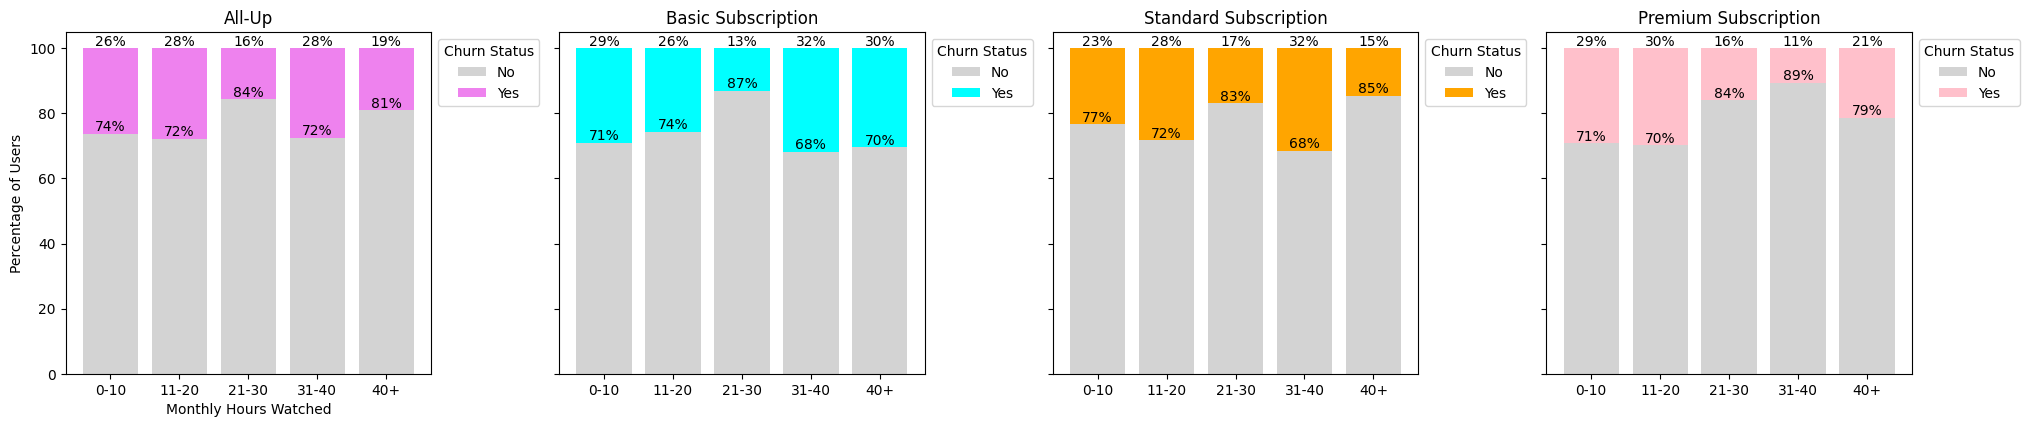

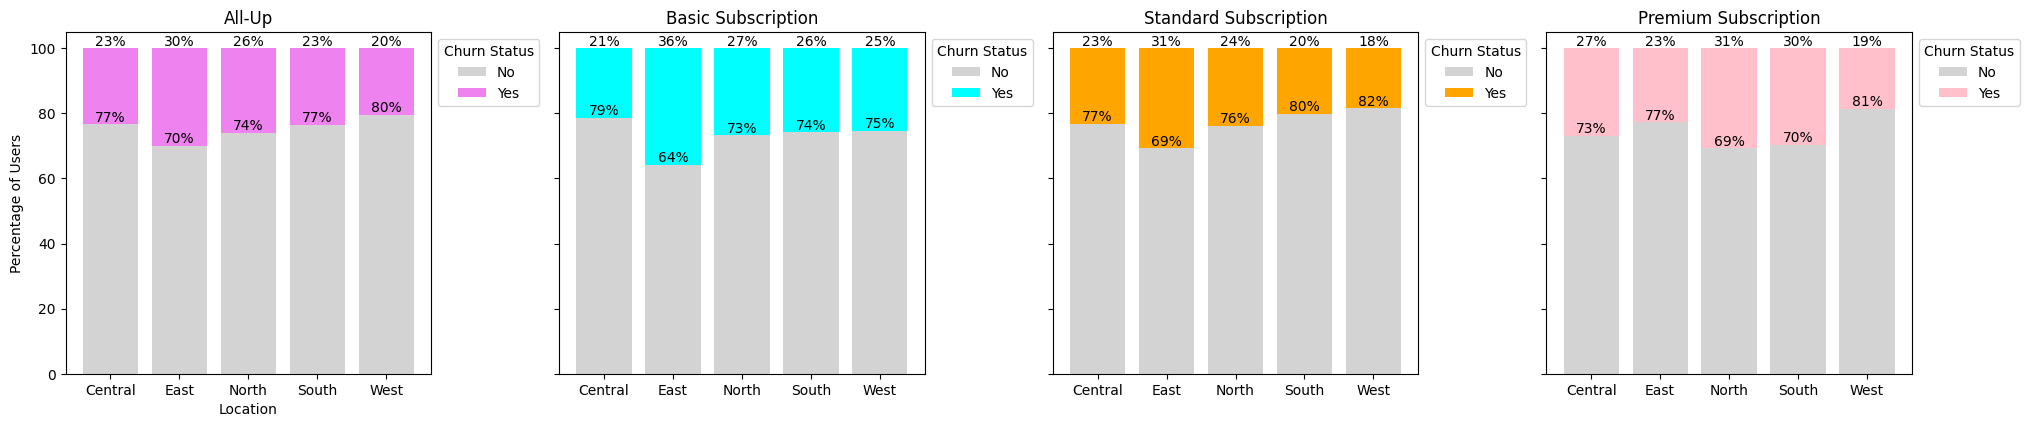

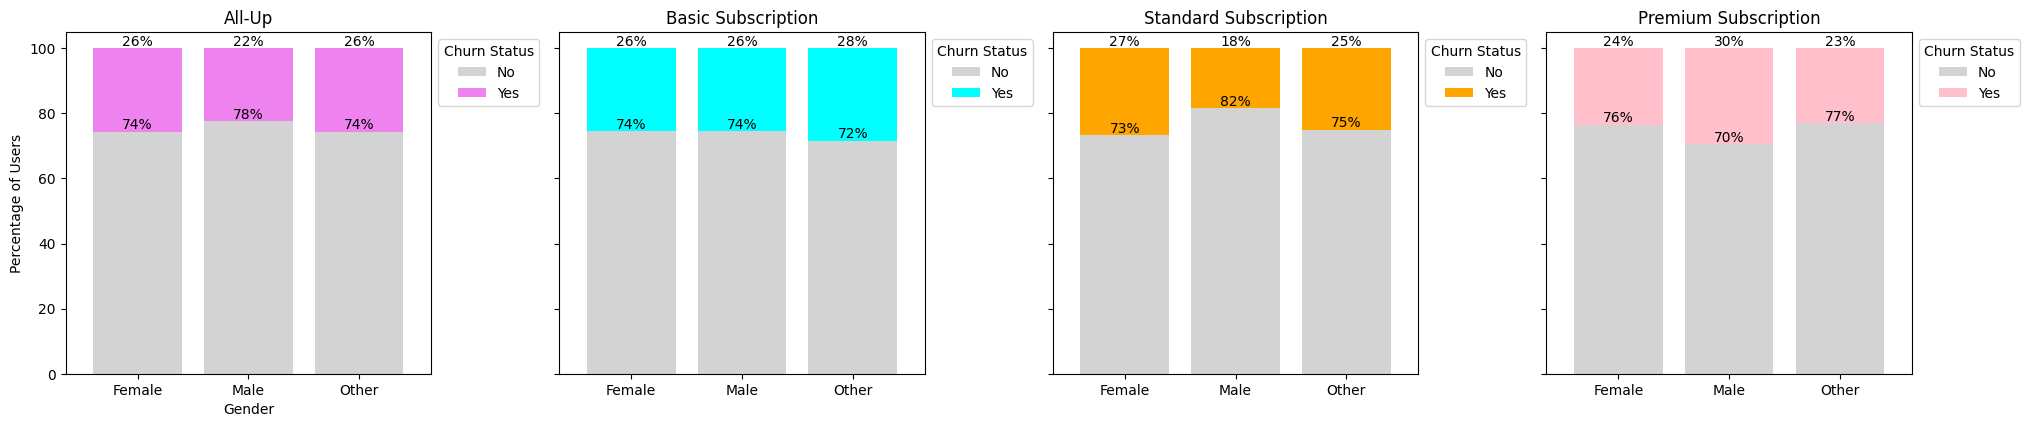

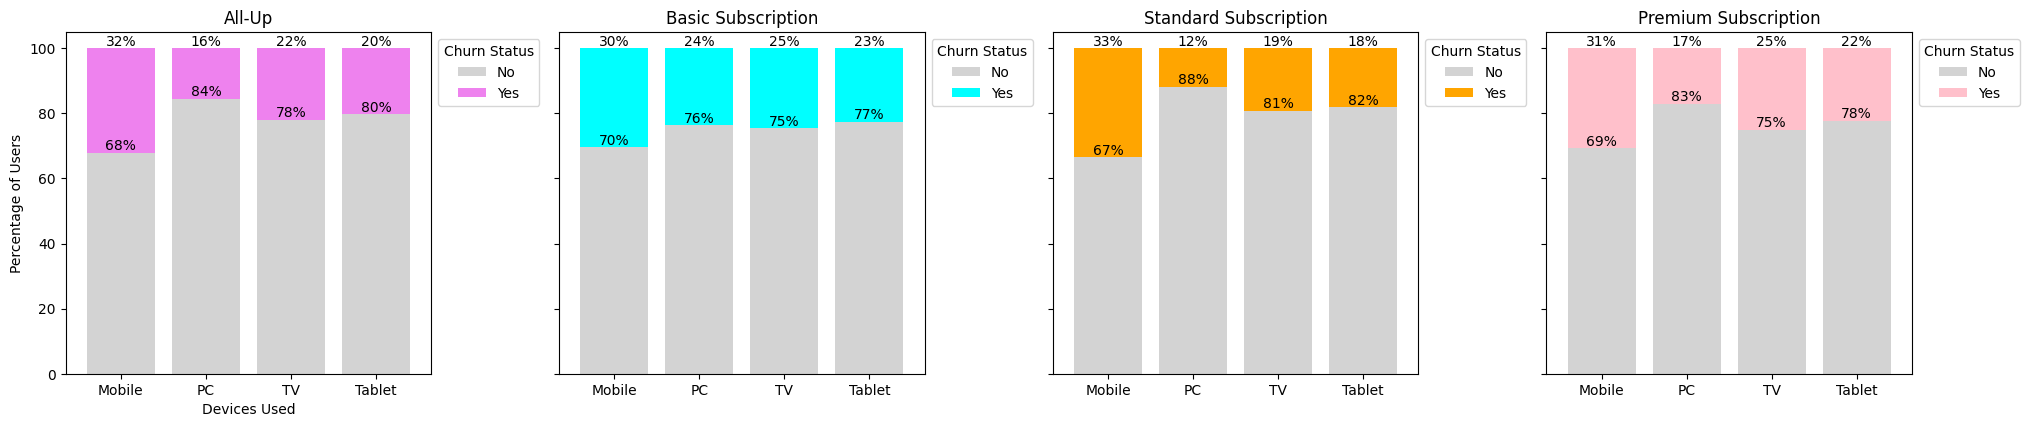

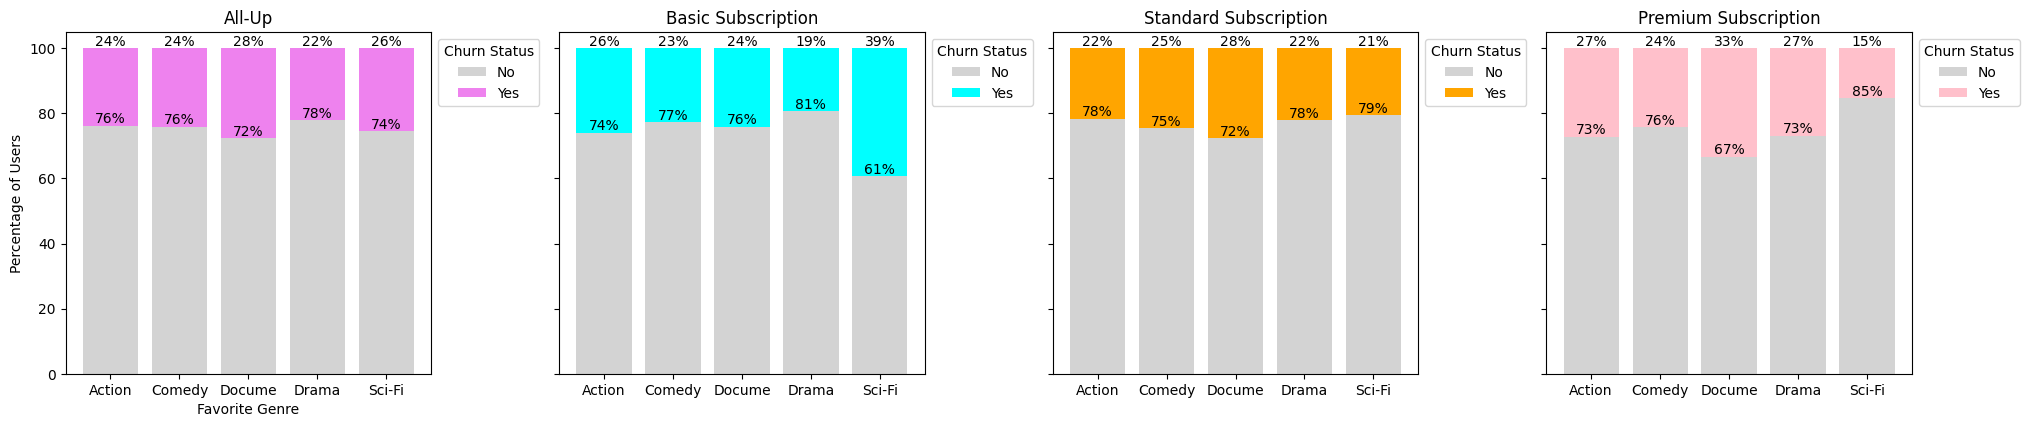

In [19]:
# Bin Monthly Hours Watched and add labels
MHW_bins = [0, 11, 21, 31, 41, 140]
MHW_labels = ['0-10', '11-20', '21-30', '31-40', '40+']

# Add an 'MHW_Group' column to the dataset
df['MHW_Group'] = pd.cut(df['Monthly_Hours_Watched'], bins=MHW_bins, labels=MHW_labels, right=False)

# Filter data for each subscription type
basic_data = df[df['Subscription_Type'] == 'Basic']
standard_data = df[df['Subscription_Type'] == 'Standard']
premium_data = df[df['Subscription_Type'] == 'Premium']

# Function to calculate the percentage of churns
def calculate_churn_percentage(data, x_axis):
    churn_counts = data.groupby([x_axis, 'Churn_Flag'], observed=False).size().unstack(fill_value=0)
    churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
    return churn_percentages

# Function to plot the churn percentages
def plot_churn_percentages(x_axis, title_x, limit_labels=False):
    basic_churn_percent = calculate_churn_percentage(basic_data, x_axis)
    standard_churn_percent = calculate_churn_percentage(standard_data, x_axis)
    premium_churn_percent = calculate_churn_percentage(premium_data, x_axis)
    total_churn_percent = calculate_churn_percentage(df, x_axis)
    
    fig, axes = plt.subplots(1, 4, figsize=(24, 8), sharey=True)

    total_churn_percent.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, color=['lightgray', 'violet'])
    axes[0].set_title('All-Up')
    axes[0].set_xlabel(title_x)
    axes[0].set_ylabel('Percentage of Users')
    axes[0].tick_params(axis='x', rotation=0)

    basic_churn_percent.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, color=['lightgray', 'cyan'])
    axes[1].set_title('Basic Subscription')
    axes[1].set_xlabel('')
    axes[1].tick_params(axis='x', rotation=0)

    standard_churn_percent.plot(kind='bar', stacked=True, ax=axes[2], width=0.8, color=['lightgray', 'orange'])
    axes[2].set_title('Standard Subscription')
    axes[2].set_xlabel('')
    axes[2].tick_params(axis='x', rotation=0)

    premium_churn_percent.plot(kind='bar', stacked=True, ax=axes[3], width=0.8, color=['lightgray', 'pink'])
    axes[3].set_title('Premium Subscription')
    axes[3].set_xlabel('')
    axes[3].tick_params(axis='x', rotation=0)

    # Adding data labels for each plot
    for ax in axes:
        for container in ax.containers:
            labels = [f'{int(h)}%' for h in container.datavalues.round()]
            ax.bar_label(container, labels=labels, label_type='edge')

    # Place the legend outside the plots
    for ax in axes:
        ax.legend(title='Churn Status', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Adjust x-axis labels if required
    if limit_labels:
        for ax in axes:
            labels = [label.get_text()[:6] for label in ax.get_xticklabels()]
            ax.set_xticklabels(labels)

    # Adjust layout of the plots
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.subplots_adjust(top=0.5)
    plt.show()

# Plot for 'Age Group'
plot_churn_percentages('Age_Group', 'Age Group')

# Plot for 'MHW_Group'
plot_churn_percentages('MHW_Group', 'Monthly Hours Watched')

# Plot for 'Location'
plot_churn_percentages('Location', 'Location')

# Plot for 'Gender'
plot_churn_percentages('Gender', 'Gender')

# Plot for 'Devices Used'
plot_churn_percentages('Devices_Used', 'Devices Used')

# Plot for 'Favorite Genre'
plot_churn_percentages('Favorite_Genre', 'Favorite Genre', limit_labels=True)

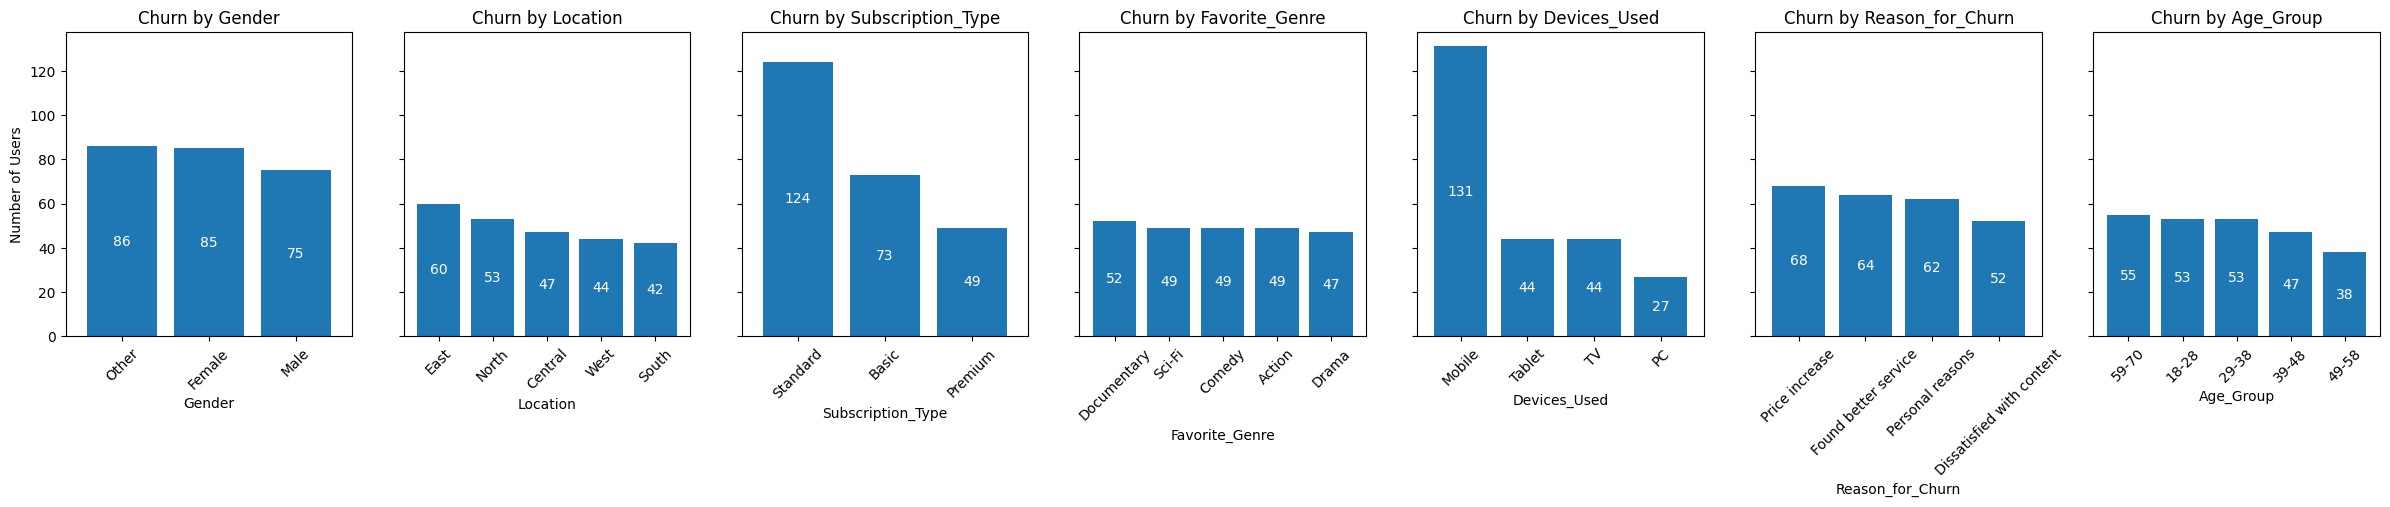

In [20]:
# Filter the dataset to only include users who have churned
churned_users = df[df['Reason_for_Churn'].notnull()]

# Columns to plot
columns_to_plot = ['Gender', 'Location', 'Subscription_Type', 'Favorite_Genre', 'Devices_Used', 'Reason_for_Churn', 'Age_Group']

# Create a figure with subplots side by side
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(24, 8), sharey=True)

for ax, column in zip(axes, columns_to_plot):
    churn_counts = churned_users[column].value_counts()
    bars = churn_counts.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title(f'Churn by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Number of Users')
    ax.tick_params(axis='x', rotation=45)

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container, label_type='center', color='white')

# Adjust layout to make room for the plots
plt.tight_layout()
plt.subplots_adjust(top=0.6)
plt.show()

Section V: Visualizing Churn Trend by Year

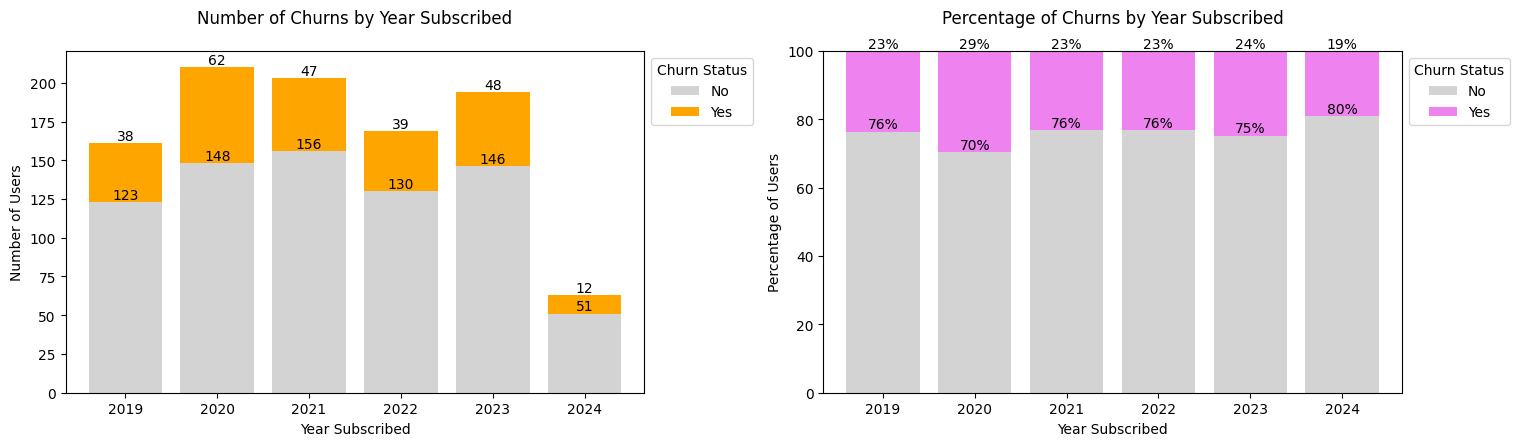

In [21]:
# Extract year from 'Subscription_Start_Date' and create 'Year_Subscribed' column
df['Year_Subscribed'] = pd.to_datetime(df['Subscription_Start_Date']).dt.year

# Function to calculate the number and percentage of churns by year subscribed
def calculate_churns_by_year(data):
    churn_counts = data.groupby(['Year_Subscribed', 'Churn_Flag']).size().unstack(fill_value=0)
    churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
    return churn_counts, churn_percentages

# Calculate churns by year subscribed
churn_counts, churn_percentages = calculate_churns_by_year(df)

# Plot the number of churns by year subscribed
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

churn_counts.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, color=['lightgray', 'orange'])
axes[0].set_title('Number of Churns by Year Subscribed', pad = 20)
axes[0].set_xlabel('Year Subscribed')
axes[0].set_ylabel('Number of Users')
axes[0].tick_params(axis='x', rotation=0)

# Adding data labels for churn counts
for container in axes[0].containers:
    labels = [f'{int(v.get_height())}' for v in container]
    axes[0].bar_label(container, labels=labels, label_type='edge')

# Plot the percentage of churns by year subscribed
churn_percentages.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, color=['lightgray', 'violet'])
axes[1].set_title('Percentage of Churns by Year Subscribed', pad = 20)
axes[1].set_xlabel('Year Subscribed')
axes[1].set_ylabel('Percentage of Users')
axes[1].set_ylim(0, 100)  # Set y-axis limit to 100%
axes[1].tick_params(axis='x', rotation=0)

# Adding data labels for churn percentages
for container in axes[1].containers:
    labels = [f'{int(v.get_height())}%' for v in container]
    axes[1].bar_label(container, labels=labels, label_type='edge')

# Place the legend outside the plots
for ax in axes:
    ax.legend(title='Churn Status', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout of the plots
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.subplots_adjust(top=0.5)
plt.show()

Section VI: Visualizing Revenue Impact

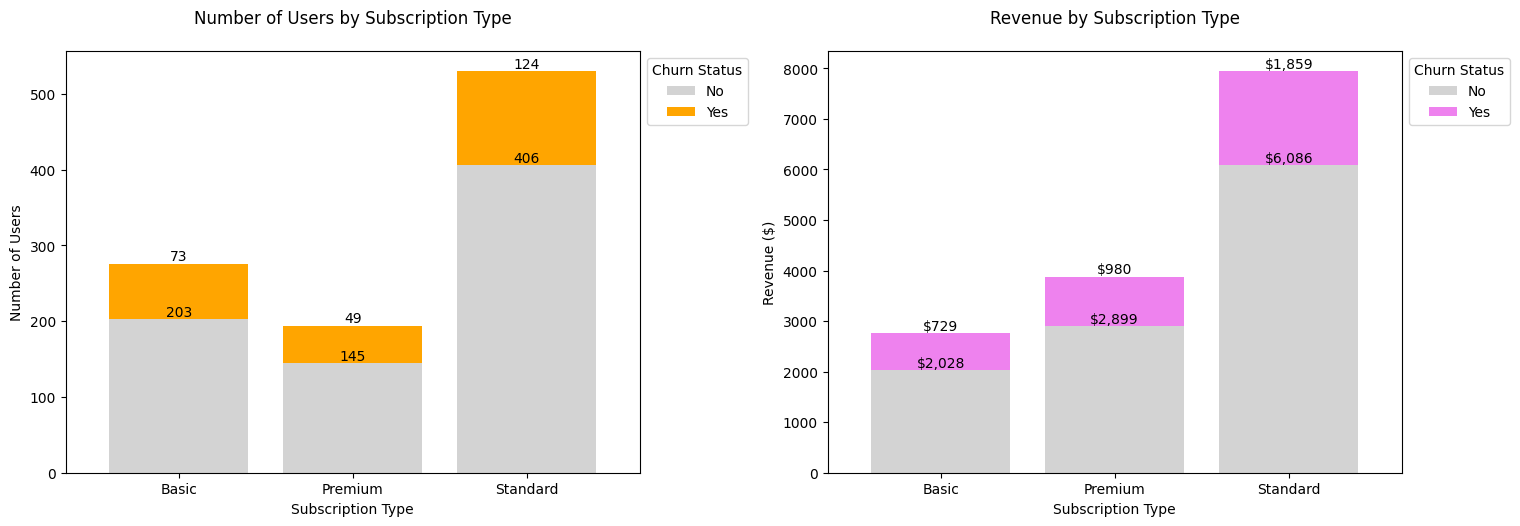

In [22]:
# Calculate the number of users by Subscription type and Churn status
user_counts = df.groupby(['Subscription_Type', 'Churn_Flag']).size().unstack(fill_value=0)

# Calculate the revenue by multiplying the number of users with respective subscription costs
subscription_prices = {'Basic': 9.99, 'Standard': 14.99, 'Premium': 19.99}
df['Revenue'] = df['Subscription_Type'].map(subscription_prices)
revenue_by_subscription = df.groupby(['Subscription_Type', 'Churn_Flag'])['Revenue'].sum().unstack(fill_value=0)

# Plot the number of users by Subscription type
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

user_counts.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, color=['lightgray', 'orange'])
axes[0].set_title('Number of Users by Subscription Type', pad=20)
axes[0].set_xlabel('Subscription Type')
axes[0].set_ylabel('Number of Users')
axes[0].tick_params(axis='x', rotation=0)

# Adding data labels for user counts
for container in axes[0].containers:
    labels = [f'{int(v.get_height())}' for v in container]
    axes[0].bar_label(container, labels=labels, label_type='edge')

# Plot the revenue by Subscription type
revenue_by_subscription.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, color=['lightgray', 'violet'])
axes[1].set_title('Revenue by Subscription Type', pad=20)
axes[1].set_xlabel('Subscription Type')
axes[1].set_ylabel('Revenue ($)')
axes[1].tick_params(axis='x', rotation=0)

# Adding data labels for revenue
for container in axes[1].containers:
    labels = [f'${v.get_height():,.0f}' for v in container]  # Rounded to nearest dollar with thousand separator
    axes[1].bar_label(container, labels=labels, label_type='edge')

# Place the legend outside the plots
for ax in axes:
    ax.legend(title='Churn Status', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.subplots_adjust(top=0.6)
plt.show()

Section VII: Analyzing Average Session Length vs Churn Status

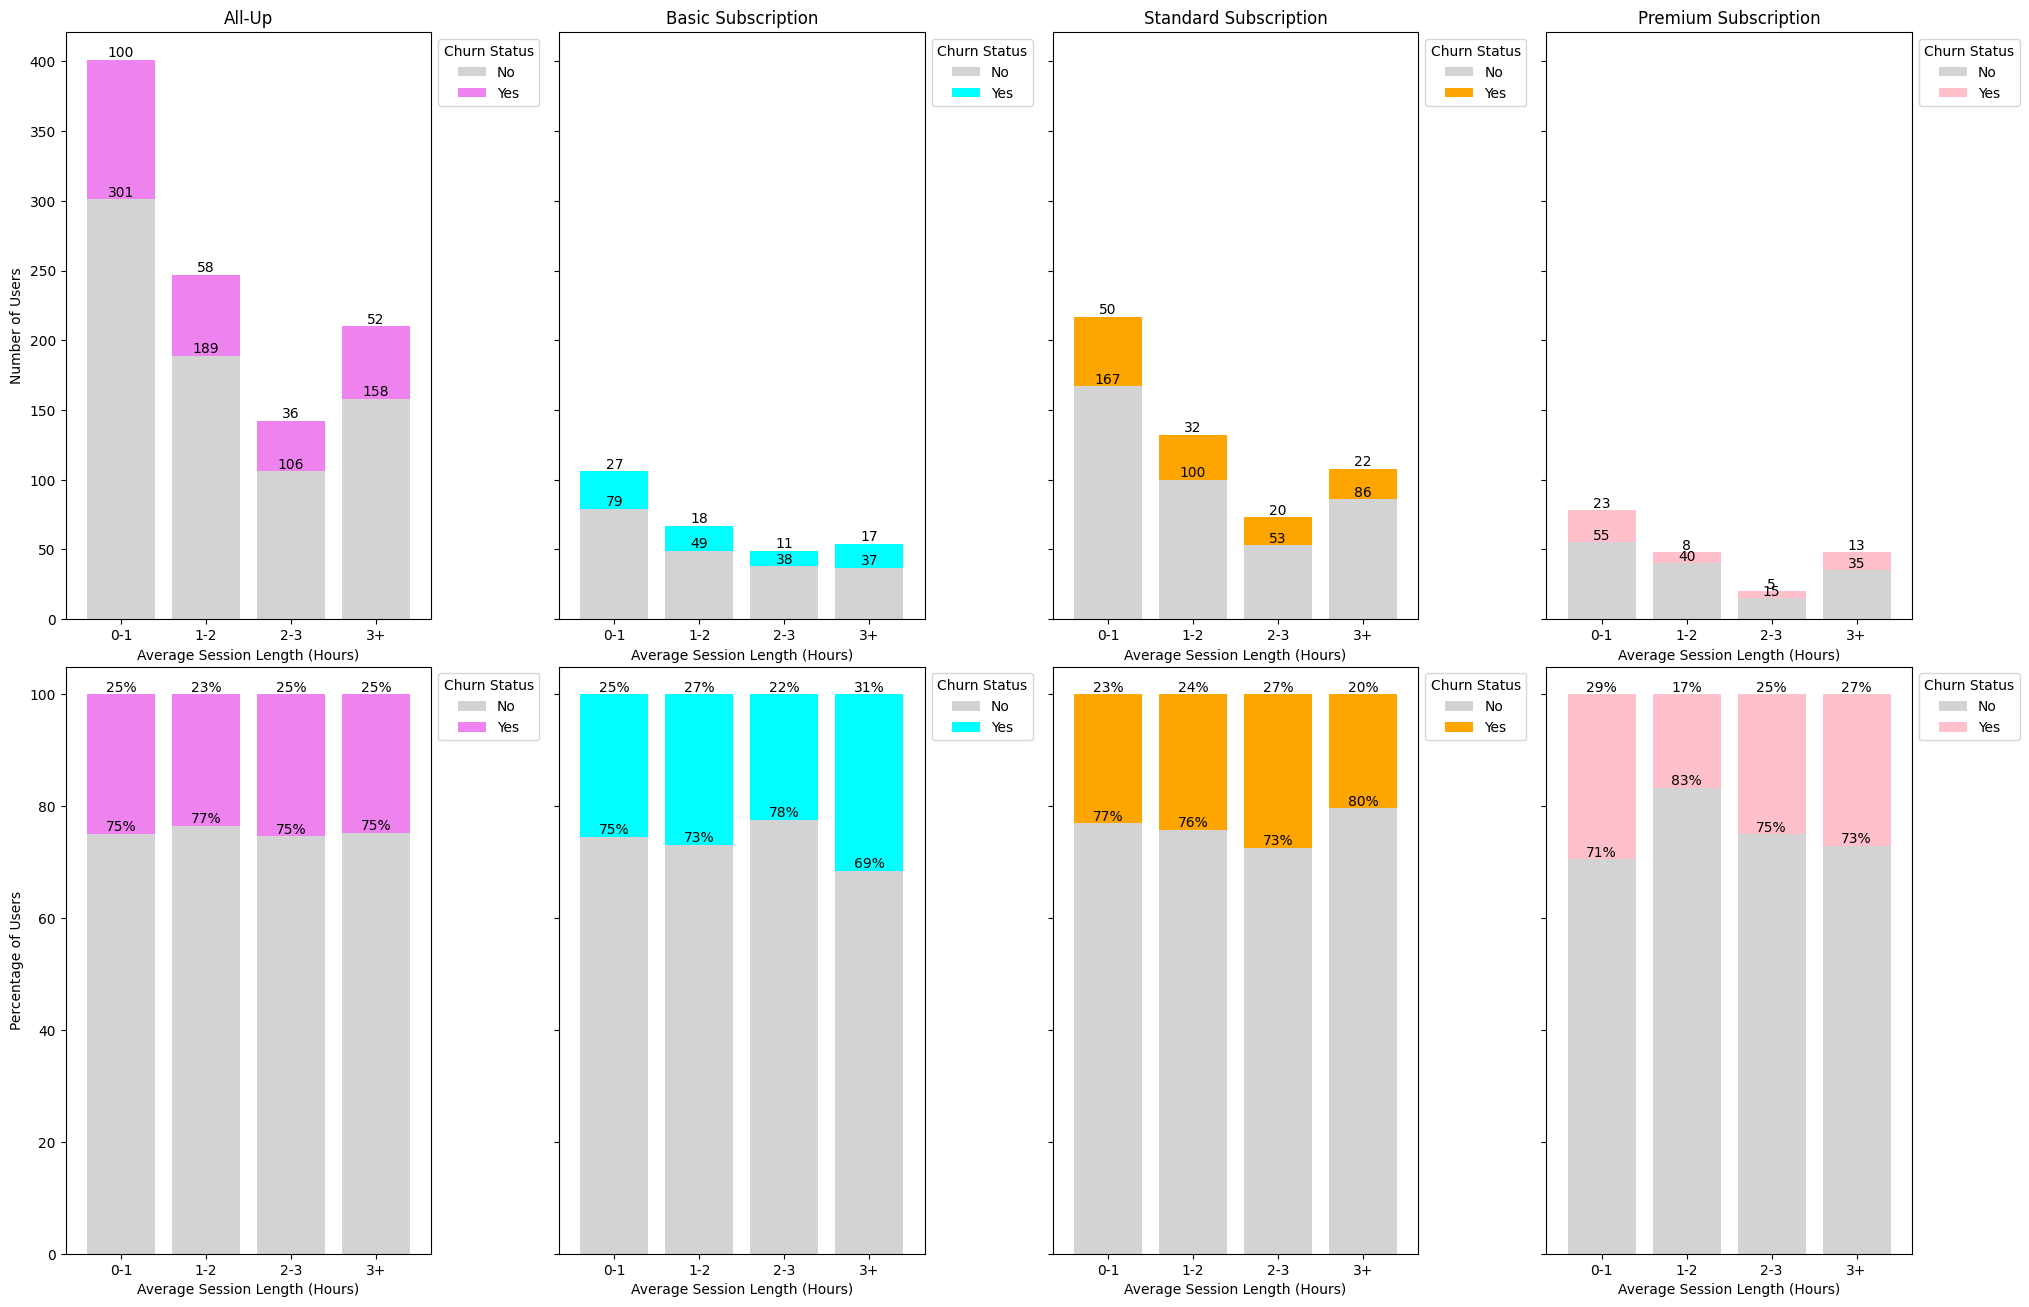

In [23]:
# Bin Average Session Length and add labels
ASL_bins = [0, 1, 2, 3, df['Average_Session_Length'].max() + 1]
ASL_labels = ['0-1', '1-2', '2-3', '3+']

# Add an 'ASL_Group' column to the dataset
df['ASL_Group'] = pd.cut(df['Average_Session_Length'], bins=ASL_bins, labels=ASL_labels, right=False)

# Filter data for each subscription type
basic_data = df[df['Subscription_Type'] == 'Basic']
standard_data = df[df['Subscription_Type'] == 'Standard']
premium_data = df[df['Subscription_Type'] == 'Premium']

# Function to calculate the number and percentage of churns
def calculate_churn_data(data, x_axis):
    churn_counts = data.groupby([x_axis, 'Churn_Flag'], observed=False).size().unstack(fill_value=0)
    churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
    return churn_counts, churn_percentages

# Calculate churn data for each subscription type
total_churn_counts, total_churn_percent = calculate_churn_data(df, 'ASL_Group')
basic_churn_counts, basic_churn_percent = calculate_churn_data(basic_data, 'ASL_Group')
standard_churn_counts, standard_churn_percent = calculate_churn_data(standard_data, 'ASL_Group')
premium_churn_counts, premium_churn_percent = calculate_churn_data(premium_data, 'ASL_Group')

# Plot the data
fig, axes = plt.subplots(2, 4, figsize=(24, 16), sharey='row')

# Top row: Number of users churned
total_churn_counts.plot(kind='bar', stacked=True, ax=axes[0, 0], width=0.8, color=['lightgray', 'violet'])
axes[0, 0].set_title('All-Up')
axes[0, 0].set_xlabel('Average Session Length (Hours)')
axes[0, 0].set_ylabel('Number of Users')
axes[0, 0].tick_params(axis='x', rotation=0)

basic_churn_counts.plot(kind='bar', stacked=True, ax=axes[0, 1], width=0.8, color=['lightgray', 'cyan'])
axes[0, 1].set_title('Basic Subscription')
axes[0, 1].set_xlabel('Average Session Length (Hours)')
axes[0, 1].tick_params(axis='x', rotation=0)

standard_churn_counts.plot(kind='bar', stacked=True, ax=axes[0, 2], width=0.8, color=['lightgray', 'orange'])
axes[0, 2].set_title('Standard Subscription')
axes[0, 2].set_xlabel('Average Session Length (Hours)')
axes[0, 2].tick_params(axis='x', rotation=0)

premium_churn_counts.plot(kind='bar', stacked=True, ax=axes[0, 3], width=0.8, color=['lightgray', 'pink'])
axes[0, 3].set_title('Premium Subscription')
axes[0, 3].set_xlabel('Average Session Length (Hours)')
axes[0, 3].tick_params(axis='x', rotation=0)

# Adding data labels for number of users churned
for ax in axes[0, :]:
    for container in ax.containers:
        labels = [f'{int(h)}' for h in container.datavalues.round()]
        ax.bar_label(container, labels=labels, label_type='edge')

# Bottom row: Percentage of churns
total_churn_percent.plot(kind='bar', stacked=True, ax=axes[1, 0], width=0.8, color=['lightgray', 'violet'])
axes[1, 0].set_xlabel('Average Session Length (Hours)')
axes[1, 0].set_ylabel('Percentage of Users')
axes[1, 0].tick_params(axis='x', rotation=0)

basic_churn_percent.plot(kind='bar', stacked=True, ax=axes[1, 1], width=0.8, color=['lightgray', 'cyan'])
axes[1, 1].set_xlabel('Average Session Length (Hours)')
axes[1, 1].tick_params(axis='x', rotation=0)

standard_churn_percent.plot(kind='bar', stacked=True, ax=axes[1, 2], width=0.8, color=['lightgray', 'orange'])
axes[1, 2].set_xlabel('Average Session Length (Hours)')
axes[1, 2].tick_params(axis='x', rotation=0)

premium_churn_percent.plot(kind='bar', stacked=True, ax=axes[1, 3], width=0.8, color=['lightgray', 'pink'])
axes[1, 3].set_xlabel('Average Session Length (Hours)')
axes[1, 3].tick_params(axis='x', rotation=0)

# Adding data labels for percentage of churns
for ax in axes[1, :]:
    for container in ax.containers:
        labels = [f'{int(h)}%' for h in container.datavalues.round()]
        ax.bar_label(container, labels=labels, label_type='edge')

# Place the legend outside the plots
for ax in axes.flatten():
    ax.legend(title='Churn Status', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout 
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.subplots_adjust(top=0.8)
plt.show()

Section VIII: Regression Analysis

In [24]:
# Adjust the 'Churn Flag' column (1 for Yes, 0 for No)
df['Churn_Flag'] = np.where(df['Reason_for_Churn'].isnull(), 0, 1)

# Select the independent variables and the dependent variable
X = df[['Average_Session_Length', 'Monthly_Hours_Watched']]
y = df['Churn_Flag']

# Ensure all values in the independent variables are numeric and handle missing values
X.loc[:, 'Average_Session_Length'] = pd.to_numeric(X['Average_Session_Length'], errors='coerce').fillna(0).astype(float)
X.loc[:, 'Monthly_Hours_Watched'] = pd.to_numeric(X['Monthly_Hours_Watched'], errors='coerce').fillna(0).astype(float)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Verify that the DataFrame has been cast to the correct data types
print(X.dtypes)
print(X.head())

# Ensure the dependent variable is of type float
y = y.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the regression results
print(model.summary())

# Predict and evaluate the model on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round()})
print(comparison_df.head())

const                     float64
Average_Session_Length    float64
Monthly_Hours_Watched     float64
dtype: object
   const  Average_Session_Length  Monthly_Hours_Watched
0    1.0                1.195762              31.513153
1    1.0                0.809002               4.982277
2    1.0                1.153570               4.114953
3    1.0                0.609503              60.244820
4    1.0                0.359971               4.711855
                            OLS Regression Results                            
Dep. Variable:             Churn_Flag   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.258
Date:                Tue, 28 May 2024   Prob (F-statistic):              0.285
Time:                        17:01:13   Log-Likelihood:                -441.47
No. Observations:                 800   AIC:                             8

Section IX: Churn by Favourite Genre

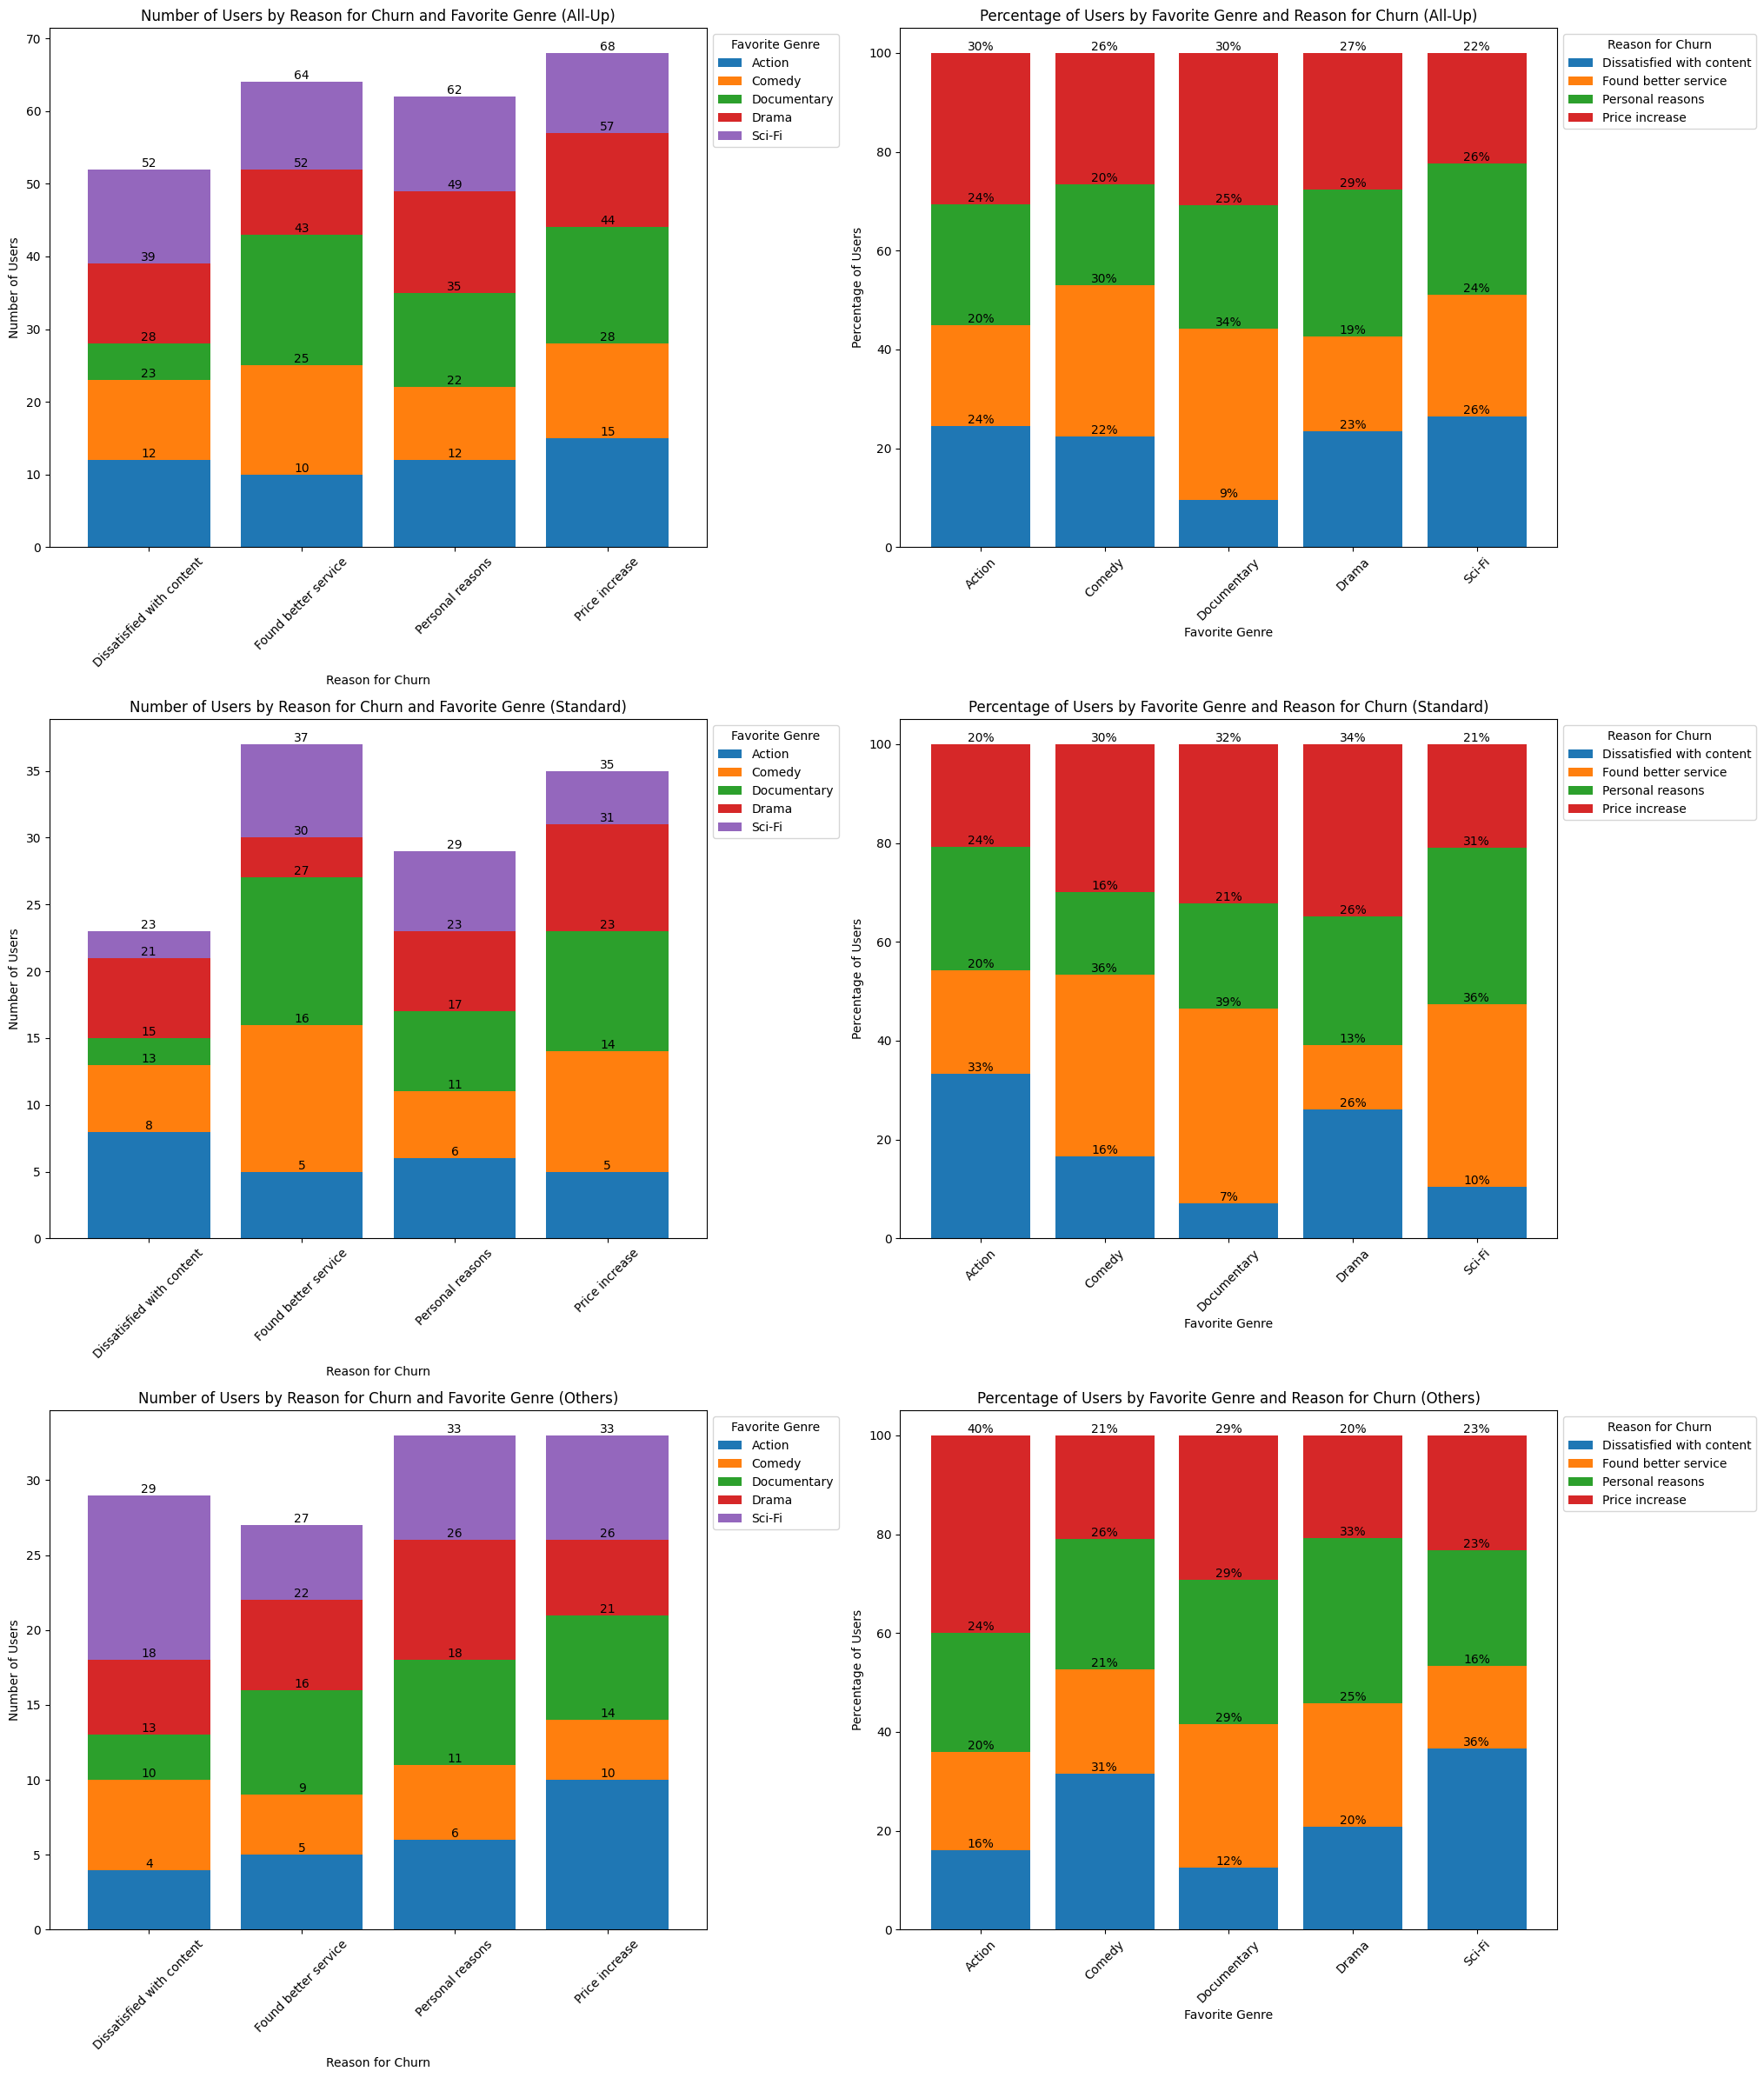

In [25]:
# Filter the dataset to only include users who have churned
churned_users = df[df['Reason_for_Churn'].notnull()]

# Separate the Standard subscription type and bundle others under 'Other'
standard_churned = churned_users[churned_users['Subscription_Type'] == 'Standard']
other_churned = churned_users[churned_users['Subscription_Type'] != 'Standard']

def plot_churn_data(churn_data, ax, title):
    # Group by Reason_for_Churn and Favorite_Genre, then count the number of users
    churn_reason_genre = churn_data.groupby(['Reason_for_Churn', 'Favorite_Genre']).size().unstack(fill_value=0)
    
    # Plot the number of users by Reason_for_Churn and Favorite_Genre
    ax = churn_reason_genre.plot(kind='bar', stacked=True, ax=ax, width=0.8)
    ax.set_xlabel('Reason for Churn')
    ax.set_ylabel('Number of Users')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

    # Place the legend outside the plot
    ax.legend(title='Favorite Genre', loc='upper left', bbox_to_anchor=(1, 1))

    return ax

def plot_percentage_reason_genre_data(churn_data, ax, title):
    # Group by Favorite_Genre and Reason_for_Churn, then count the number of users
    churn_genre_reason = churn_data.groupby(['Favorite_Genre', 'Reason_for_Churn']).size().unstack(fill_value=0)
    
    # Create the percentage-based data
    churn_genre_reason_percentage = churn_genre_reason.div(churn_genre_reason.sum(axis=1), axis=0) * 100

    # Plot the percentage-based bar graph
    ax = churn_genre_reason_percentage.plot(kind='bar', stacked=True, ax=ax, width=0.8)
    ax.set_xlabel('Favorite Genre')
    ax.set_ylabel('Percentage of Users')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

    # Add data labels
    for container in ax.containers:
        labels = [f'{int(h)}%' for h in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='edge')

    # Place the legend outside the plot
    ax.legend(title='Reason for Churn', loc='upper left', bbox_to_anchor=(1, 1))

    return ax

# Create a figure with six subplots in a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(24, 24))

# Plot data for All-Up
plot_churn_data(churned_users, axes[0, 0], 'Number of Users by Reason for Churn and Favorite Genre (All-Up)')
plot_percentage_reason_genre_data(churned_users, axes[0, 1], 'Percentage of Users by Favorite Genre and Reason for Churn (All-Up)')

# Plot data for Standard subscription
plot_churn_data(standard_churned, axes[1, 0], 'Number of Users by Reason for Churn and Favorite Genre (Standard)')
plot_percentage_reason_genre_data(standard_churned, axes[1, 1], 'Percentage of Users by Favorite Genre and Reason for Churn (Standard)')

# Plot data for Rest subscriptions
plot_churn_data(other_churned, axes[2, 0], 'Number of Users by Reason for Churn and Favorite Genre (Others)')
plot_percentage_reason_genre_data(other_churned, axes[2, 1], 'Percentage of Users by Favorite Genre and Reason for Churn (Others)')

# Adjust layout to make room for the legends and titles
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Section X: Kaplan Meier Survival Analysis

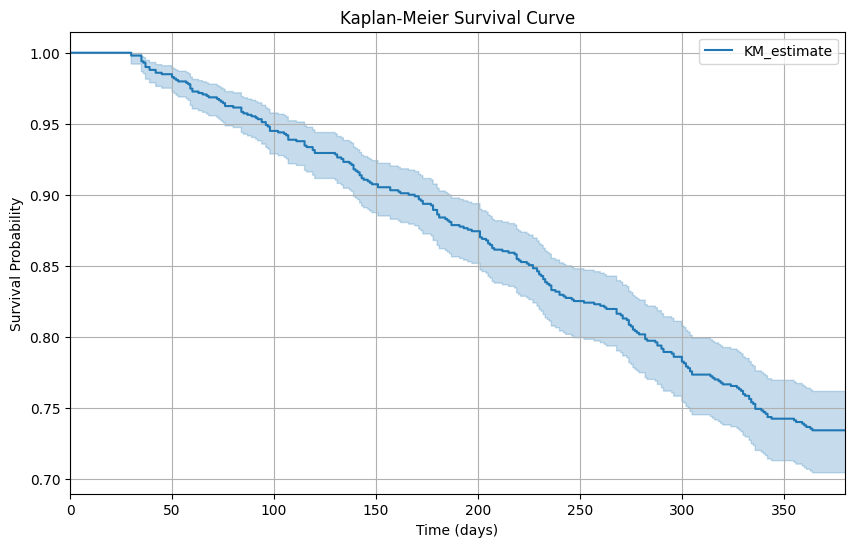

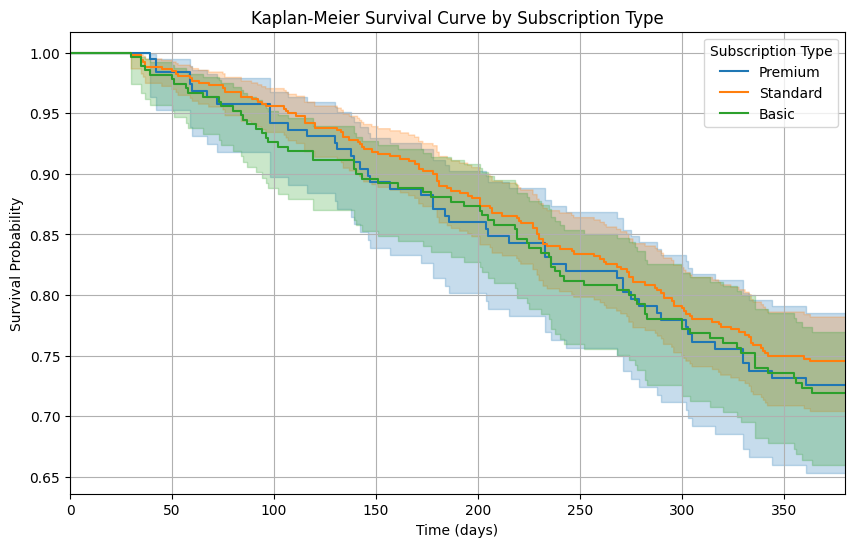

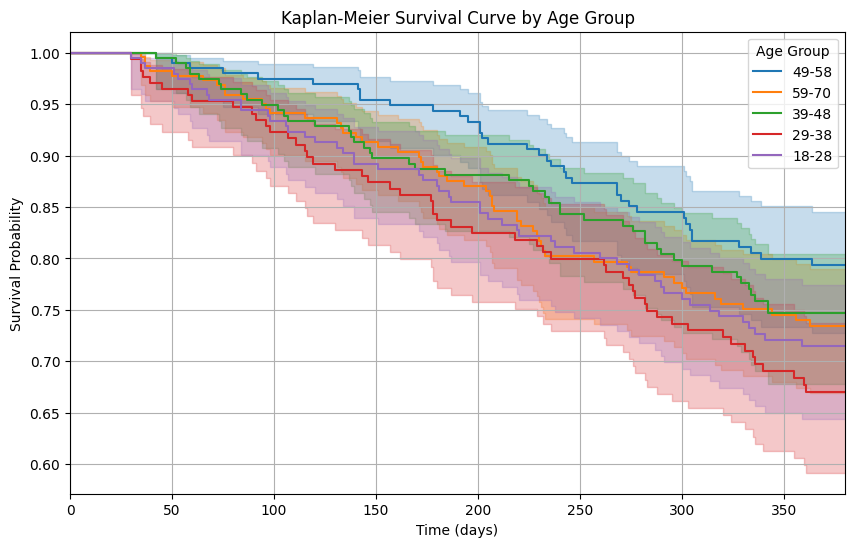

In [26]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from datetime import datetime

# Convert date columns to datetime
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])

# Calculate time to churn in days
current_date = datetime.now()
df['Time_to_Churn'] = (df['Date_of_Churn'].fillna(current_date) - df['Subscription_Start_Date']).dt.days

# Start KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(durations=df['Time_to_Churn'], event_observed=df['Churned'])

# Plot the survival function limited to 380 days (the graph flatlines after)
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.xlim(0, 380)
plt.grid(True)
plt.show()

# Plot the survival function by subscription type
plt.figure(figsize=(10, 6))

for subscription_type in df['Subscription_Type'].unique():
    kmf.fit(durations=df[df['Subscription_Type'] == subscription_type]['Time_to_Churn'], 
            event_observed=df[df['Subscription_Type'] == subscription_type]['Churned'], 
            label=subscription_type)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curve by Subscription Type')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.xlim(0, 380)
plt.legend(title='Subscription Type')
plt.grid(True)
plt.show()

# Plot the survival function by age group
plt.figure(figsize=(10, 6))

for age_group in df['Age_Group'].unique():
    kmf.fit(durations=df[df['Age_Group'] == age_group]['Time_to_Churn'], 
            event_observed=df[df['Age_Group'] == age_group]['Churned'], 
            label=age_group)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curve by Age Group')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.xlim(0, 380)
plt.legend(title='Age Group')
plt.grid(True)
plt.show()